# 1. Mô phỏng quy hoạch tần số

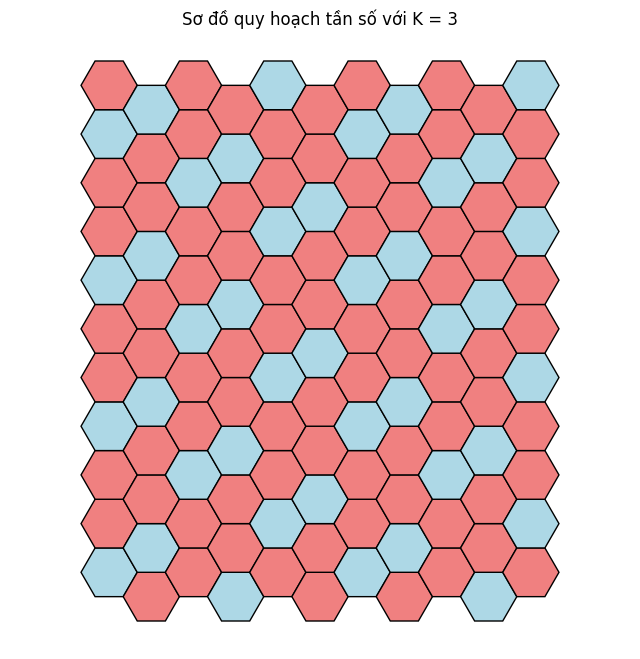

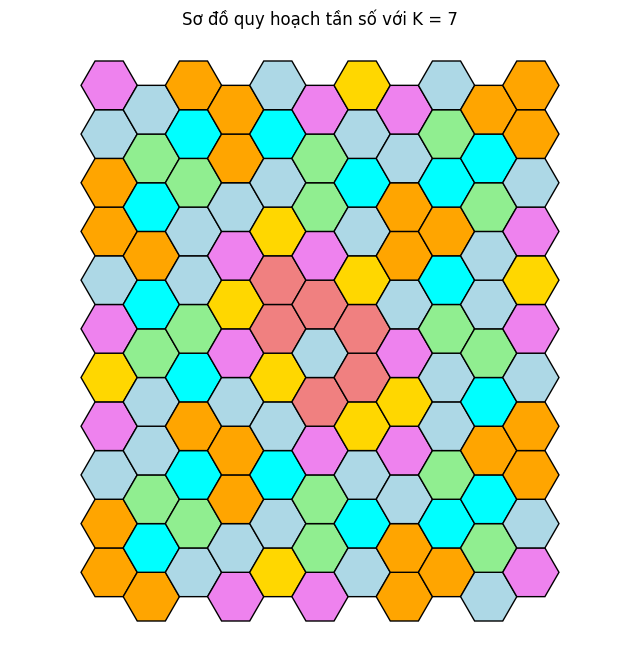

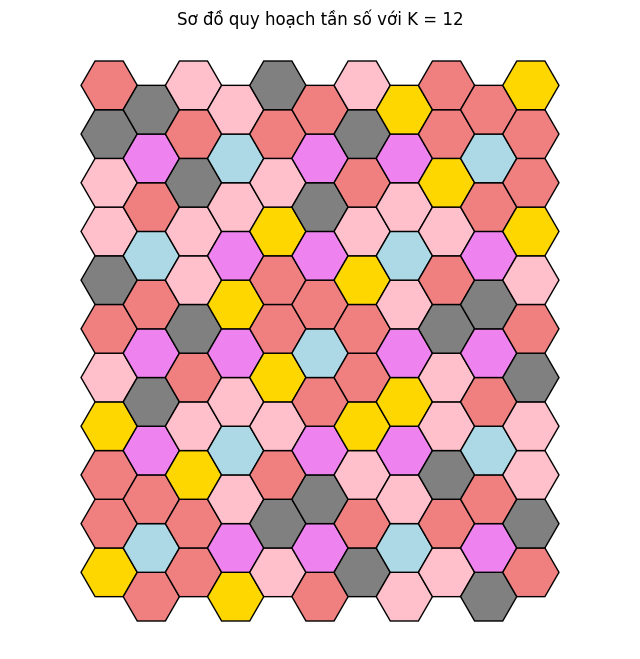

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm vẽ một cell lục giác
def draw_hexagon(x, y, color='lightgray', edge_color='black'):
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = x + np.cos(angles)
    y_hex = y + np.sin(angles)
    plt.fill(x_hex, y_hex, color=color, edgecolor=edge_color, linewidth=1)

# Hàm tạo lưới tổ ong và đánh dấu các cell đồng kênh
def plot_frequency_reuse(K, grid_size=5):
    plt.figure(figsize=(8, 8))
    plt.title(f"Sơ đồ quy hoạch tần số với K = {K}")
    
    # Tạo danh sách các màu để phân biệt cell đồng kênh
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'orange', 'cyan', 'pink', 'brown', 'gray']
    
    # Duyệt qua lưới tổ ong
    for i in range(-grid_size, grid_size + 1):
        for j in range(-grid_size, grid_size + 1):
            x = i * 1.5
            y = j * np.sqrt(3) + (i % 2) * (np.sqrt(3) / 2)
            
            # Xác định nhóm tần số dựa trên công thức K = i^2 + i*j + j^2
            frequency_group = (i**2 + i*j + j**2) % K
            
            # Vẽ cell với màu theo nhóm tần số
            draw_hexagon(x, y, colors[frequency_group % len(colors)])
    
    plt.xlim(-grid_size * 2, grid_size * 2)
    plt.ylim(-grid_size * 2, grid_size * 2)
    plt.axis('equal')
    plt.axis('off')
    plt.show()

# Chạy mô phỏng cho các giá trị K = 3, 7, 12
for K in [3, 7, 12]:
    plot_frequency_reuse(K)


# 2 Tính toán nhiễu đồng kênh bằng Python
- Viết một chương trình để tính toán mức nhiễu đồng kênh dựa trên khoảng cách tái 
sử dụng D. 
- So sánh nhiễu giữa các giá trị K=7, K=12.

In [2]:
import numpy as np

# Hàm tính SIR (Signal to Interference Ratio)
def calculate_SIR(K, gamma=4):
    R = 1  # Giả sử bán kính cell là 1
    D = R * np.sqrt(3 * K)  # Khoảng cách tái sử dụng tần số
    N = 6  # Số cell đồng kênh lân cận
    SIR = (D / R) ** gamma / N  # Tính SIR theo công thức
    return SIR

# So sánh mức nhiễu giữa K=7 và K=12
K_values = [7, 12]
SIR_values = {K: calculate_SIR(K) for K in K_values}

# In kết quả
for K, SIR in SIR_values.items():
    print(f"K = {K}, SIR = {SIR:.2f} dB")

# So sánh kết quả
if SIR_values[7] > SIR_values[12]:
    print("K=7 có mức nhiễu đồng kênh thấp hơn K=12.")
else:
    print("K=12 có mức nhiễu đồng kênh thấp hơn K=7.")


K = 7, SIR = 73.50 dB
K = 12, SIR = 216.00 dB
K=12 có mức nhiễu đồng kênh thấp hơn K=7.


- Kết quả và phân tích
+ Khi 𝐾=7, khoảng cách tái sử dụng D nhỏ hơn so với K=12, nên mức nhiễu cao hơn.
+ Khi K=12, khoảng cách tái sử dụng lớn hơn, nên mức nhiễu thấp hơn, nhưng tài nguyên tần số bị phân chia nhiều hơn.
- Kết luận: 
+ K=12 giúp giảm nhiễu nhưng làm giảm hiệu suất sử dụng phổ tần, trong khi 
+ K=7 có mức nhiễu cao hơn nhưng tận dụng tần số tốt hơn